# Problem 1

* Dataset Link : https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats#google_vignette
* Information for data : https://rdrr.io/cran/ISLR/man/Carseats.html

* Bu veri seti ile bulunması gereken hesaplamalar aşağıda verilmiştir.
  
a.	Income ve education değişkenlerinin histogramlarını çizin. Histogramlar çift modlu mu yoksa tek modlu mu(bimodal or unimodal)? Eğik(skewed) mi, değil mi? Histogramın şeklini yorumlayınız.

b.	Sales değişkeni için ortalama, medyan, varyans ve standart sapma ölçümlerini ve değişkenler arasındaki covaryansı hesaplayınız.

c.	Ages değişkeni için 10, 25, 75, 90 niceliklerini hesaplayınız.

d.	Tüm değişkenleri özetlemek için betimleyici istatistik bilgilerini hesaplayınız.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def check_df(dataframe, head=10):
    '''
    Provides general information about the loaded data.

    Parameters
    ----------
    dataframe: dataframe
    head: int

    Notes
    ----------
    The head value is set to a constant 5.
    '''
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Corr #####################")
    print(dataframe.corr())
    print("##################### Describe #####################")
    print(dataframe.describe())

data = pd.read_csv('data/Data_For_Problem_1.csv')
check_df(data)

##################### Shape #####################
(400, 11)
##################### Types #####################
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
##################### Head #####################
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   
5  10.81        124     113           13         501     72       Bad   78   
6   6.63        115     105 

### A Income ve education değişkenlerinin histogramlarını çizin. Histogramlar çift modlu mu yoksa tek modlu mu(bimodal or unimodal)? Eğik(skewed) mi, değil mi? Histogramın şeklini yorumlayınız.

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

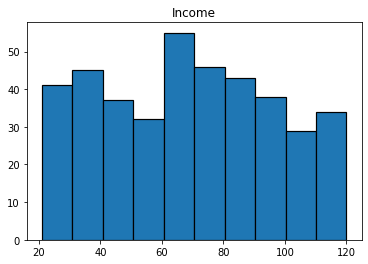

In [3]:
data.hist(column='Income',grid=False,edgecolor='black', linewidth=1.2)

array([[<AxesSubplot:title={'center':'Education'}>]], dtype=object)

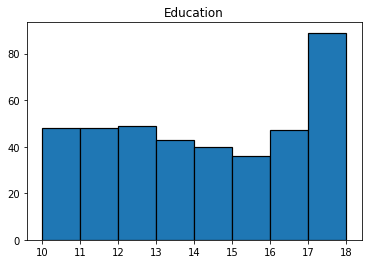

In [6]:
bins = [10,11,12,13,14,15,16,17,18]
data.hist(column='Education',grid=False,edgecolor='black', linewidth=1.2,bins=bins)

### b. Sales değişkeni için ortalama, medyan, varyans ve standart sapma ölçümlerini ve değişkenler arasındaki covaryansı hesaplayınız.

In [28]:
def data_metrics(data, column):
    print("Mean: ",data[column].mean())
    print("Median: ",data[column].median())
    print("Variance: ",data[column].var())
    print("Standard Deviation: ",data[column].std())

data_metrics(data,'Sales')

Mean:  7.496325000000001
Median:  7.49
Variance:  7.975625808897243
Standard Deviation:  2.824115048806837


In [29]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


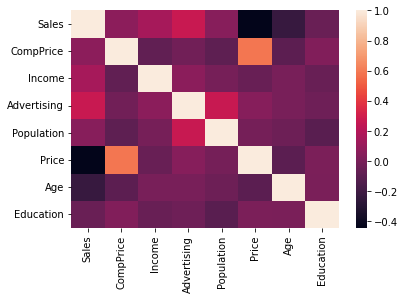

In [4]:
sns.heatmap(data.corr());

#### c. Ages değişkeni için 10, 25, 75, 90 niceliklerini hesaplayınız.

In [5]:
x = np.quantile(data['Age'], [0.1,0.25,0.75,0.9])
print(x)

[30.   39.75 66.   76.  ]


#### d. Tüm değişkenleri özetlemek için betimleyici istatistik bilgilerini hesaplayınız.

In [6]:
check_df(data)

##################### Shape #####################
(400, 11)
##################### Types #####################
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
##################### Head #####################
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   
5  10.81        124     113           13         501     72       Bad   78   
6   6.63        115     105 